## Predicting Heart Disease using Machine Learning
**Introduction :**

This notebook explores the application of machine learning techniques to predict heart disease. It utilizes the 'heart.csv' dataset and evaluates the performance of three classification models:

1. **K-Nearest Neighbors (KNN)**
2. **Decision Tree**
3. **Logistic Regression**

**Workflow:**

The notebook follows a typical machine learning workflow, encompassing the following steps:

- **Data Loading and Preprocessing:** Importing necessary libraries, loading the dataset, and exploratory data analysis through visualizations. It also includes preprocessing steps such as label encoding, one-hot encoding, and feature scaling using StandardScaler.

- **Model Training and Evaluation:** Each model is trained on a portion of the data and evaluated using various metrics, including accuracy, confusion matrix, classification report, ROC curve, and AUC. Error rate gtaph used to determine the optimal K value for KNN.

- **Model Comparison and Conclusion:** The notebook provides a comprehensive summary of the performance of all three models, comparing their strengths and weaknesses based on the evaluation metrics.

- **Recommendations:** Offering suggestions for further improvement, such as hyperparameter tuning, feature engineering, and employing ensemble methods.

data overview:

In [1]:
# working libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data set
heart = pd.read_csv('heart.csv')

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#proper naming
heart.columns = heart.columns.str.lower()
heart.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


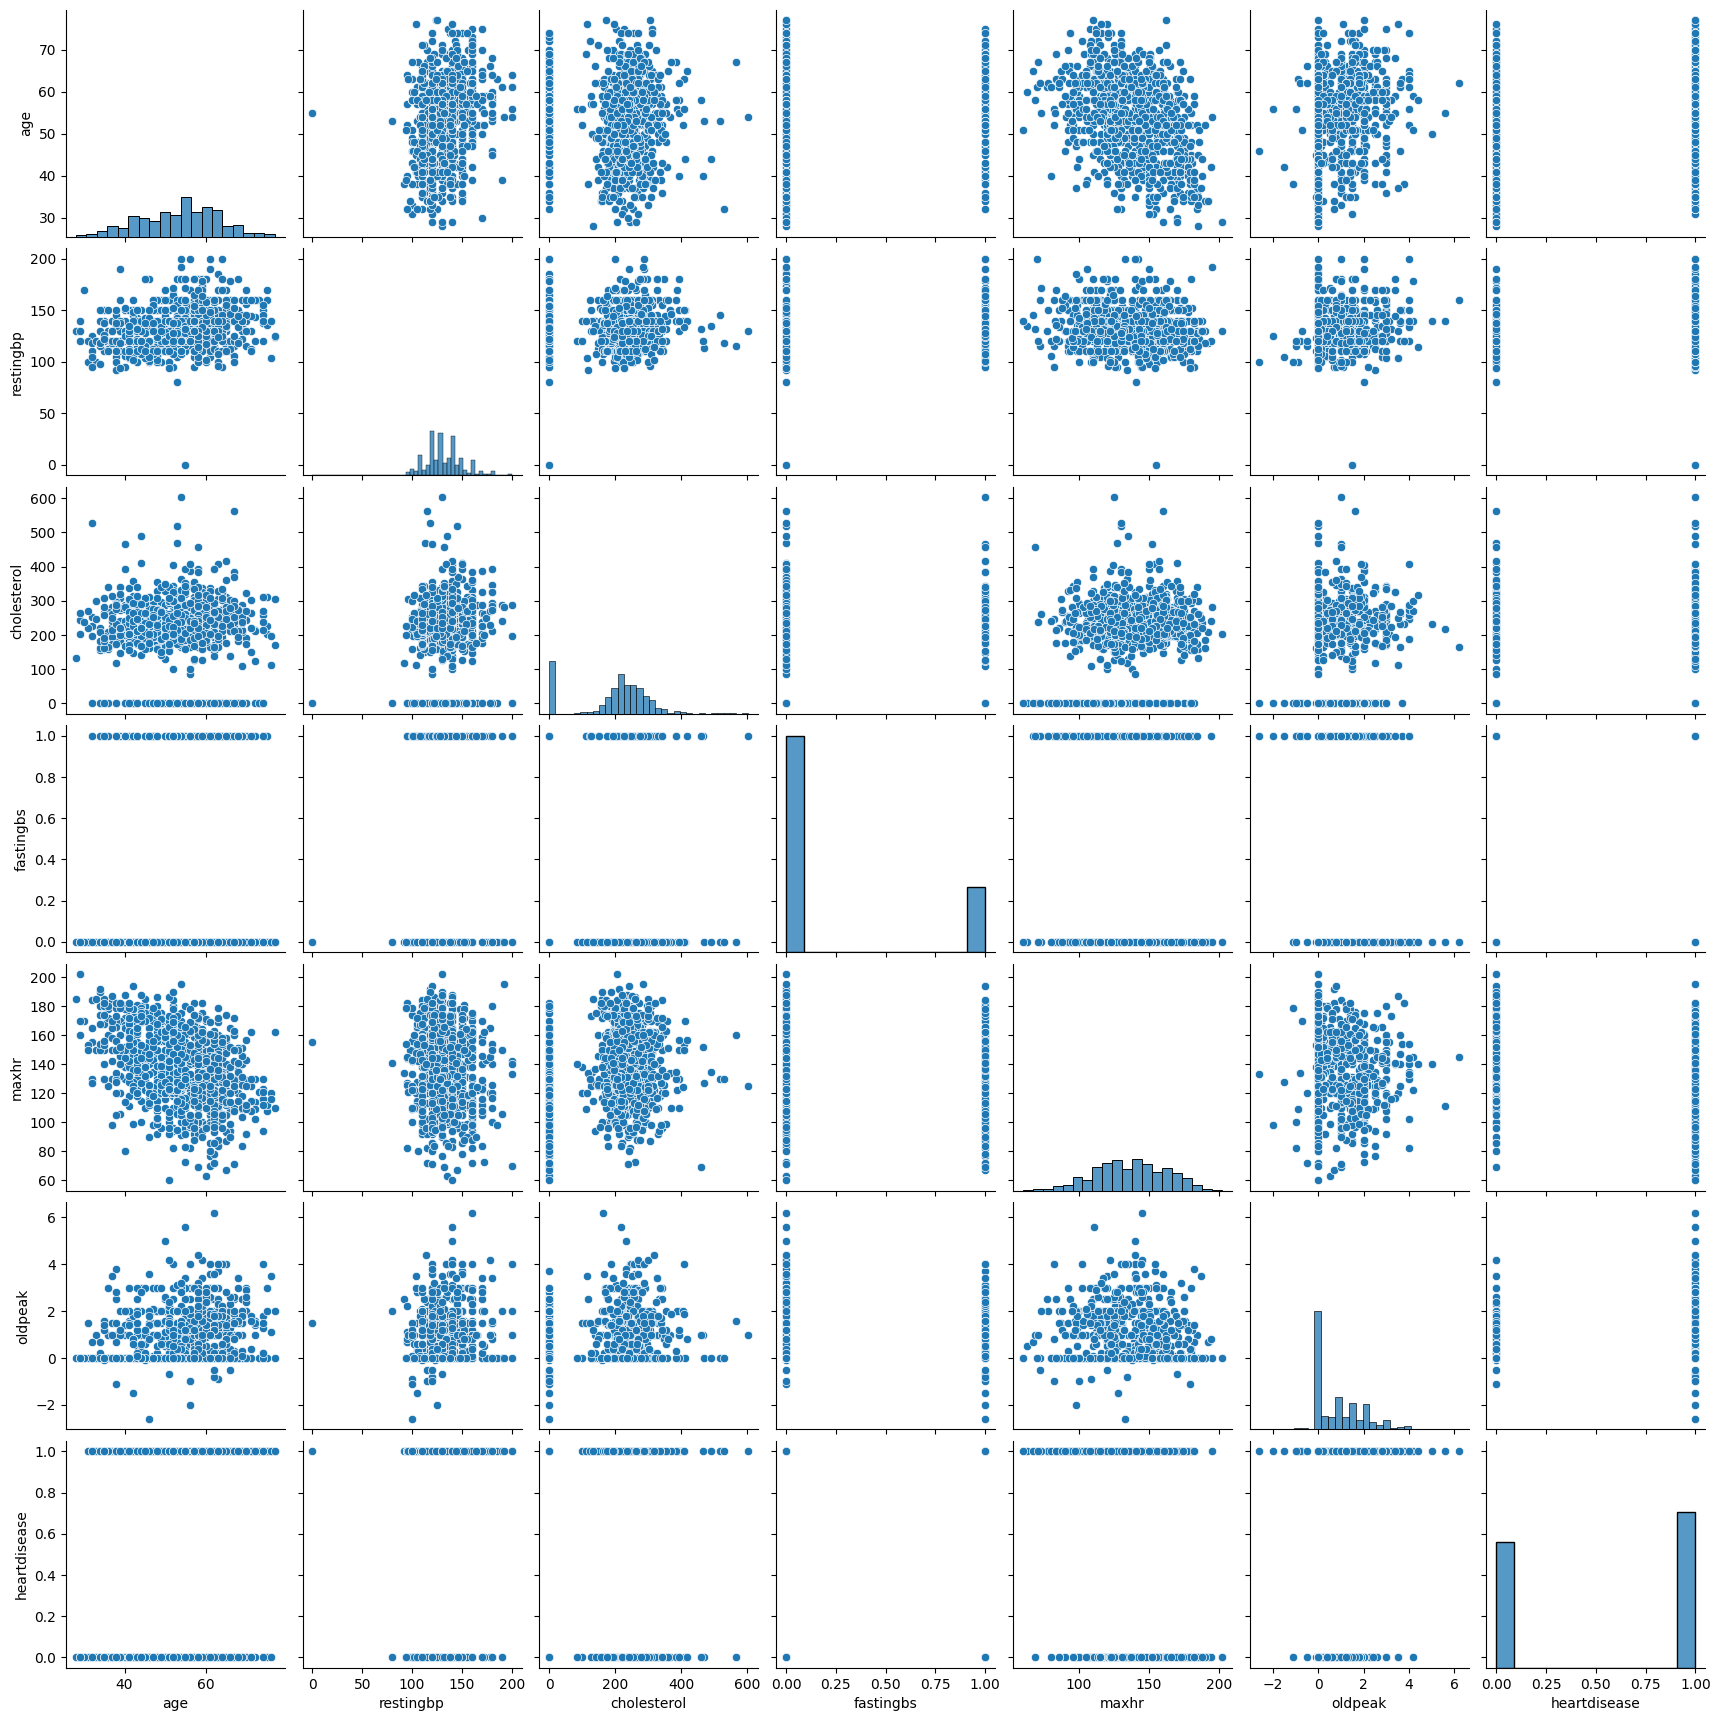

In [5]:
# visual the dataset
sns.pairplot(heart)
plt.show()

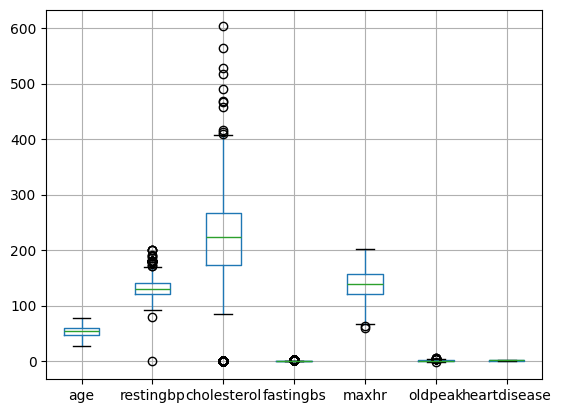

In [6]:
#plot boxplot
heart.boxplot()
plt.show()

In [7]:
#Separate the features and the label (‘HeartDisease’ column)
x = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

In [8]:
#Apply label encoder on 'Sex' and 'ExerciseAngina' columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])
x['exerciseangina'] = le.fit_transform(x['exerciseangina'])

In [9]:
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    int64  
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    int64  
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 79.0+ KB


,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up


In [10]:
#Apply one hot encoding on other categorical features['chestpaintype','restingecg','st_slope']
x = pd.get_dummies(x,columns=['chestpaintype','restingecg','st_slope'])

In [11]:
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                918 non-null    int64  
 1   sex                918 non-null    int64  
 2   restingbp          918 non-null    int64  
 3   cholesterol        918 non-null    int64  
 4   fastingbs          918 non-null    int64  
 5   maxhr              918 non-null    int64  
 6   exerciseangina     918 non-null    int64  
 7   oldpeak            918 non-null    float64
 8   chestpaintype_ASY  918 non-null    bool   
 9   chestpaintype_ATA  918 non-null    bool   
 10  chestpaintype_NAP  918 non-null    bool   
 11  chestpaintype_TA   918 non-null    bool   
 12  restingecg_LVH     918 non-null    bool   
 13  restingecg_Normal  918 non-null    bool   
 14  restingecg_ST      918 non-null    bool   
 15  st_slope_Down      918 non-null    bool   
 16  st_slope_Flat      918 non

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
0,40,1,140,289,0,172,0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,False,False,True,False,False,True,False,False,False,True


In [12]:
#Split the data (75% and 25%) use random state = 0
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) # we didn't use stratify


In [13]:
# apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# K-NearestNeighbors

In [14]:
# apply KNN and choose the best K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)

    y_Kpred_test = knn_model.predict(x_test)

    test_error_k = 1 - accuracy_score(y_test,y_Kpred_test)
    test_error_rates.append(test_error_k)

Text(0.5, 0, 'K Value')

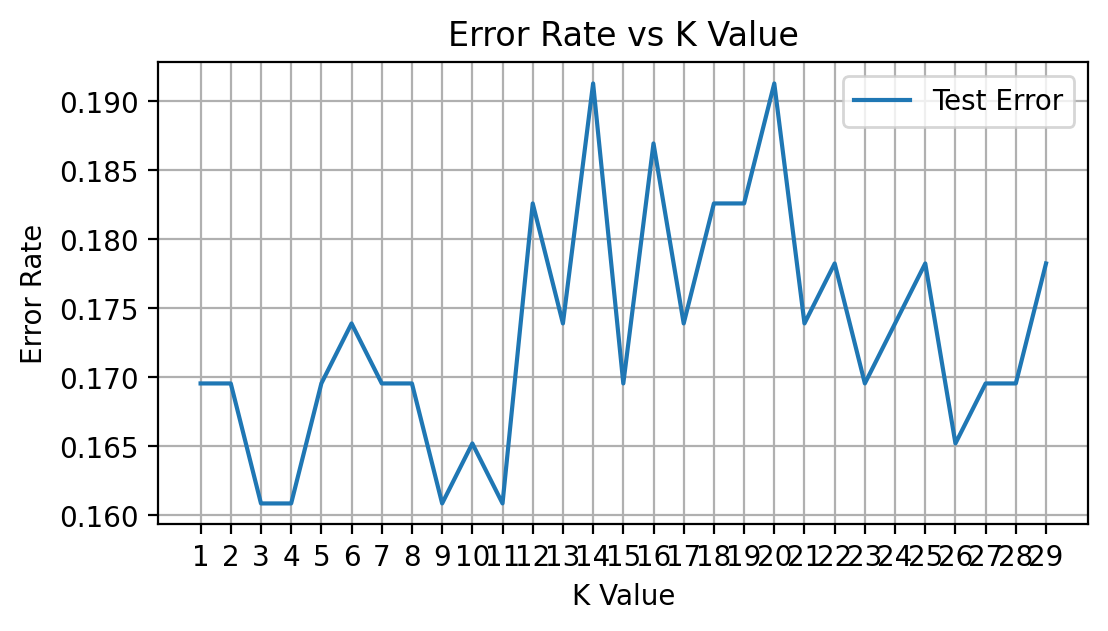

In [15]:
# Plot the error rate against K value to find the optimal K

plt.figure(figsize=(6,3),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.xticks(range(1,30))
plt.legend()
plt.title('Error Rate vs K Value')
plt.grid(True)
plt.ylabel('Error Rate')
plt.xlabel("K Value")

The plot suggests that k= 4, 9, and 11  have similarly low error rates.
Due to the lack of domain knowledge to make a strong preference, k=11 is chosen as it is generally more robust and less prone to overfitting with a larger k value

In [16]:
# Train the KNN classifier with the optimal K value (11 in this case)

classifier_knn = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [17]:
# Make predictions on the test set using the trained KNN model

y_Kpred = classifier_knn.predict(x_test)

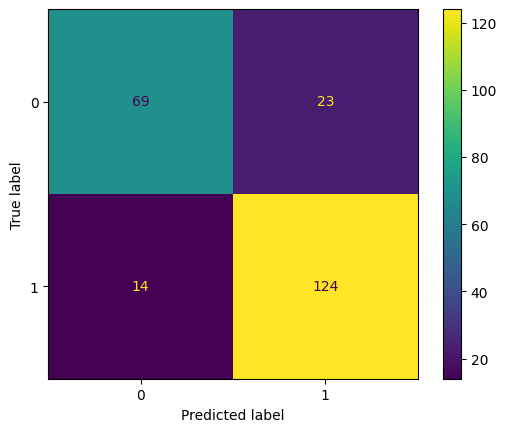

In [18]:
# Evaluate the KNN model using a confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm_k = confusion_matrix(y_test, y_Kpred)
disp_knn = ConfusionMatrixDisplay(cm_k)
disp_knn.plot()

In [19]:
# Calculate and print the accuracy of the KNN model

accuracy_score(y_test, y_Kpred)


0.8391304347826087

In [20]:
# Generate and print a classification report for the KNN model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_Kpred))


              precision    recall  f1-score   support

           0       0.83      0.75      0.79        92
           1       0.84      0.90      0.87       138

    accuracy                           0.84       230
   macro avg       0.84      0.82      0.83       230
weighted avg       0.84      0.84      0.84       230



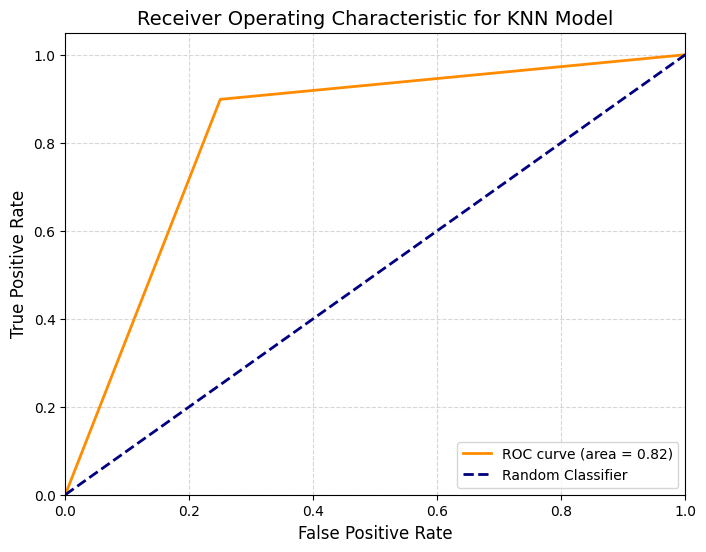

In [21]:
# Plot the ROC curve and calculate the AUC for the KNN model.
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_Kpred)
roc_auc = roc_auc_score(y_test, y_Kpred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')  # Plot random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic for KNN Model', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Decision Tree

In [22]:
# decision tree model
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier_dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
# Make predictions on the test set using the trained Decision Tree model

y_pred_DT = classifier_dt.predict(x_test)

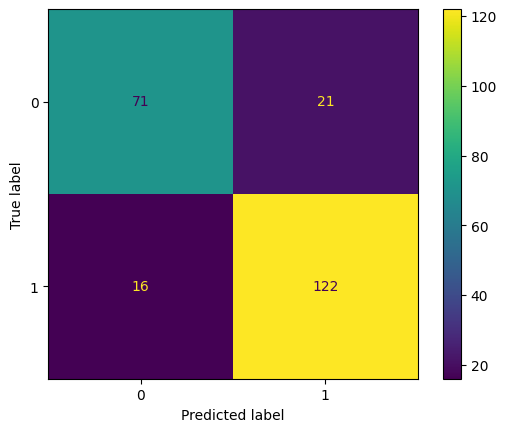

In [24]:
# Evaluate the Decision Tree model using a confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm_dt = confusion_matrix(y_test, y_pred_DT)
disp_dt = ConfusionMatrixDisplay(cm_dt)
disp_dt.plot()

In [25]:
# Calculate and print the accuracy of the Decision Tree model

accuracy_score(y_test, y_pred_DT)

0.8391304347826087

In [26]:
# Generate and print a classification report for the Decision Tree model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT))


              precision    recall  f1-score   support

           0       0.82      0.77      0.79        92
           1       0.85      0.88      0.87       138

    accuracy                           0.84       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230



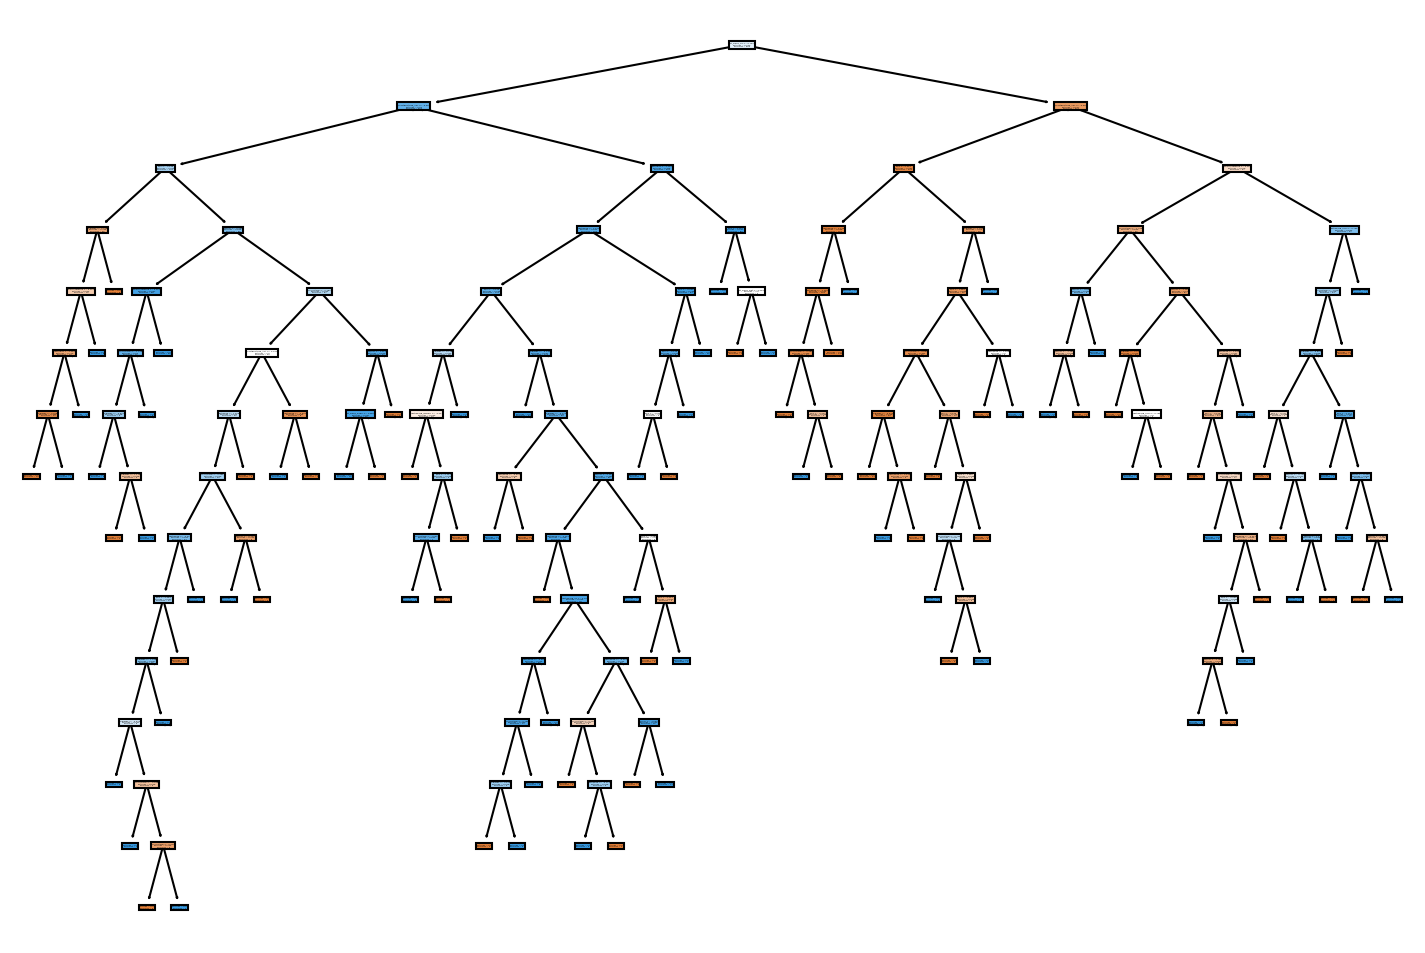

In [27]:
# Visualize the Decision Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
# Get feature names after one-hot encoding
feature_names = x.columns
plot_tree(classifier_dt,filled=True,feature_names=feature_names);

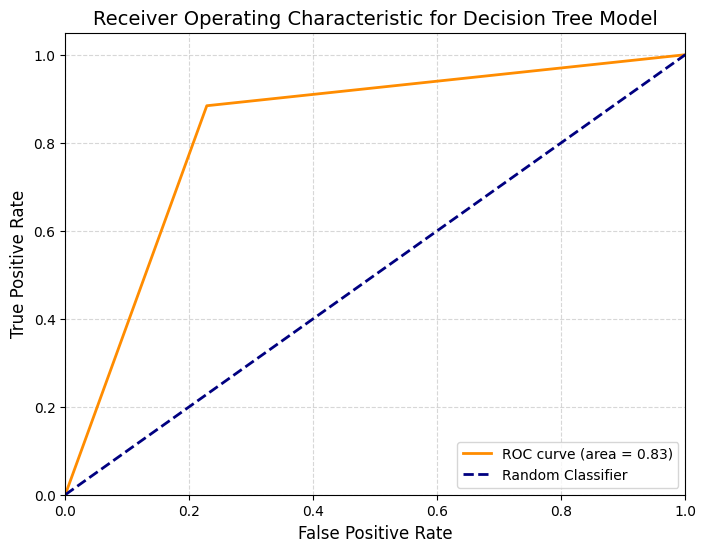

In [28]:
# Plot the ROC curve and calculate the AUC for the Decision Tree model.
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic for Decision Tree Model', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



# Logestic Regression



In [29]:
# Train a Logistic Regression model

from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [30]:
# Make predictions on the test set using the trained Logistic Regression model

y_pred_lr = classifier_lr.predict(x_test)

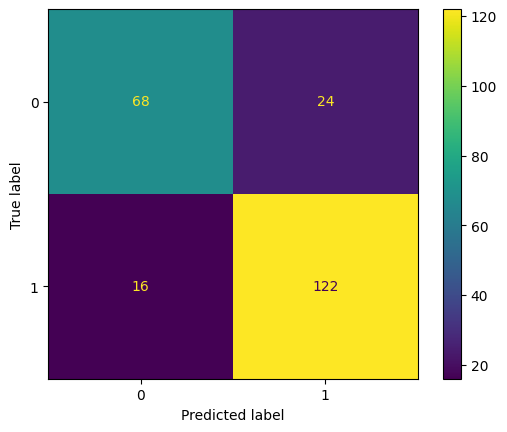

In [31]:
# Evaluate the Logistic Regression model using a confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr)
disp_lr.plot()

In [32]:
# Calculate and print the accuracy of the Logistic Regression model

accuracy_score(y_test, y_pred_lr)


0.8260869565217391

In [33]:
# Generate and print a classification report for the Logistic Regression model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.81      0.74      0.77        92
           1       0.84      0.88      0.86       138

    accuracy                           0.83       230
   macro avg       0.82      0.81      0.82       230
weighted avg       0.83      0.83      0.82       230



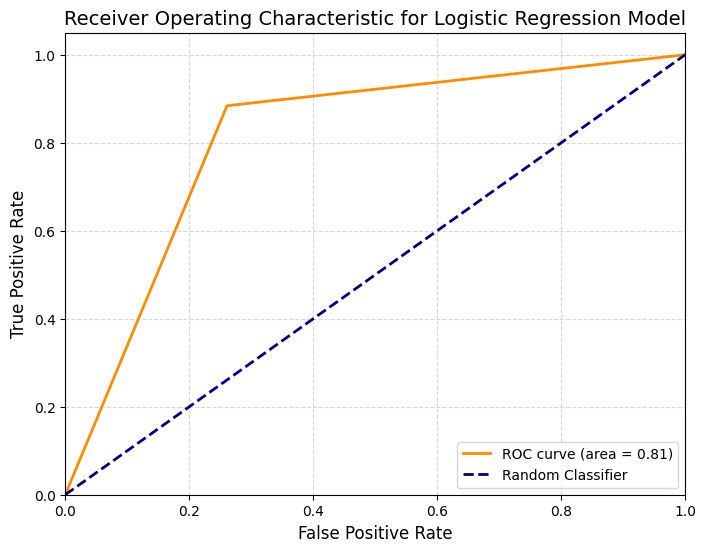

In [34]:
# Plot the ROC curve and calculate the AUC for the Logestic Regression model.
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic for Logistic Regression Model', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




# Model Evaluation Summary:

This section summarizes the performance of three classification models—K-Nearest Neighbors (KNN), Decision Tree, and Logistic Regression—applied to the heart disease dataset. The evaluation considers various metrics including accuracy, confusion matrix, classification report, ROC curve, and AUC to provide a comprehensive assessment of each model's performance.
#### **Performance Summary:**

   | Model            | Accuracy | AUC  | Strengths                                          | Weaknesses                                                                    |
   | ---------------- | -------- | ---- | --------------------------------------------------- | ------------------------------------------------------------------------------ |
   | K-Nearest Neighbors (KNN) | 84%      | 0.82 | Simple, effective with tuning.                     | Computationally expensive, sensitive to irrelevant features.                      |
   | Decision Tree    | 84%      | 0.83 | Easy to interpret, handles various data types.     | Prone to overfitting, unstable with data variations.                            |
   | Logistic Regression | 83%      | 0.81 | Simple, efficient, interpretable, less overfitting. | Assumes linear relationships, may not perform well with complex datasets. |


## K-Nearest Neighbors (KNN)
|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
|       0      |    0.83   |  0.75  |   0.79   |    92   |
|       1      |    0.84   |  0.90  |   0.87   |   138   |
|    accuracy  |           |        |   0.84   |   230   |
|   macro avg  |    0.84   |  0.82  |   0.83   |   230   |
|weighted avg  |    0.84   |  0.84  |   0.84   |   230   |
          
    
## Decision Tree

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
|       0      |    0.82   |  0.77  |   0.79   |    92   |
|       1      |    0.85   |  0.88  |   0.87   |   138   |
|    accuracy  |           |        |   0.84   |   230   |
|   macro avg  |    0.83   |  0.83  |   0.83   |   230   |
|weighted avg  |    0.84   |  0.84  |   0.84   |   230   |

## Logistic Regression

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
|       0      |    0.81   |  0.74  |   0.77   |    92   |
|       1      |    0.84   |  0.88  |   0.86   |   138   |
|    accuracy  |           |        |   0.83   |   230   |
|   macro avg  |    0.82   |  0.81  |   0.82   |   230   |
|weighted avg  |    0.83   |  0.83  |   0.82   |   230   |

## Comparison and Conclusion:

The **Decision Tree** model demonstrated the highest AUC (0.83) and balanced performance across metrics, making it the most promising choice for this problem. While **KNN** matched the **Decision Tree** in accuracy (84%), its AUC and interpretability were slightly lower. **Logistic Regression**, although showing slightly lower accuracy (83%) and AUC (0.81), remains competitive due to its simplicity, ease of interpretation, and reduced risk of overfitting.

The final model selection should consider trade-offs between accuracy, complexity, and interpretability, as well as domain knowledge. Additional factors, such as computational cost and scalability, may also influence the decision.

## Recommendations:
**- Hyperparameter Tuning**: Experiment with different distance metrics (KNN), pruning techniques (Decision Tree), and regularization techniques (Logistic Regression).


**- Feature Engineering**: Consider creating new features or transforming existing ones to potentially improve model accuracy for all models.


**- Dimensionality Reduction**: Apply dimensionality reduction techniques (e.g., PCA) to reduce the number of features, potentially improving performance, especially for KNN.


**- Cross-Validation**: Employ techniques like k-fold cross-validation to get a more robust estimate of the models' performance.


**- Ensemble Methods**: Consider using ensemble methods like Random Forest or Gradient Boosting, especially for Decision Trees, to improve performance and reduce overfitting.


**- Balanced data splitting**: Employ stratify during data splitting to ensure proportional class representation in training and testing sets.